<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #12: Análisis de sentimiento
`Fecha de entrega: Mayo 27, 2021 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [2]:
import pandas as pd
import tweepy

In [3]:

keys = pd.read_csv("C:/Users/paula/OneDrive/Escritorio/KONRAD_LORENZ/SEMESTRE_II/NLP/keys.csv", header=None)
keys = dict(zip(keys[0],keys[1]))
keys.keys()

dict_keys(['api_key', 'api_secret_key', 'access_token', 'access_token_secret', 'bearer_token'])

In [4]:
# Autenticar a través de la API 
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:

# Paso 4 Recolectar datos
tweets = tweepy.Cursor(api.search,
                       q=['giro de italia -RT'],
                       lang='es',
                       geocode='4.7110,-74.0721,100km',
                       tweet_mode='extended',
                       include_rts=False,
                       ).items(100)

In [6]:
# Objeto generador
t = [tweet for tweet in tweets]

t_processed = []

for tweet in t: 
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append('Bogotá')
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/stuatus/{tweet.id}")
    
    t_processed.append(temp)


In [7]:
    
data = pd.DataFrame(t_processed)
data.columns = ['tweets', 'date', 'city', 'user_location', 'id', 'link']


In [8]:
from textblob  import  TextBlob 

In [9]:
from vaderSentiment.vaderSentiment  import  SentimentIntensityAnalyzer

In [10]:
 vader = SentimentIntensityAnalyzer()
data . head ()

,tweets,date,city,user_location,id,link
0,Fuerza champion Dios te de mucha fortaleza en ...,2021-05-27 03:22:52,Bogotá,,1397755153663549445,https://twitter.com/i/web/stuatus/139775515366...
1,#Ilustración / Hoy @rflorezsantiago ilustra qu...,2021-05-27 03:01:19,Bogotá,"Pereira, Colombia",1397749732777332740,https://twitter.com/i/web/stuatus/139774973277...
2,#DeportesRCN \n\nEgan Bernal se encontró con l...,2021-05-27 02:34:49,Bogotá,"Bogotá, Colombia",1397743063850786817,https://twitter.com/i/web/stuatus/139774306385...
3,Giro de Italia: Los compañeros de Egan en el G...,2021-05-27 02:15:32,Bogotá,Bogotá,1397738208897740801,https://twitter.com/i/web/stuatus/139773820889...
4,Que grande @Eganbernal Que Dios lo fortalezca ...,2021-05-27 01:30:47,Bogotá,"Ibagué, Colombia",1397726946767917059,https://twitter.com/i/web/stuatus/139772694676...


In [11]:
data['sentimiento_vader'] = data['tweets'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sentimiento_textblob'] = data['tweets'].apply(lambda valor: TextBlob(valor).sentiment.polarity)
data.head()


,tweets,date,city,user_location,id,link,sentimiento_vader,sentimiento_textblob
0,Fuerza champion Dios te de mucha fortaleza en ...,2021-05-27 03:22:52,Bogotá,,1397755153663549445,https://twitter.com/i/web/stuatus/139775515366...,0.5994,0.0
1,#Ilustración / Hoy @rflorezsantiago ilustra qu...,2021-05-27 03:01:19,Bogotá,"Pereira, Colombia",1397749732777332740,https://twitter.com/i/web/stuatus/139774973277...,0.0000,0.0
2,#DeportesRCN \n\nEgan Bernal se encontró con l...,2021-05-27 02:34:49,Bogotá,"Bogotá, Colombia",1397743063850786817,https://twitter.com/i/web/stuatus/139774306385...,0.0000,0.0
3,Giro de Italia: Los compañeros de Egan en el G...,2021-05-27 02:15:32,Bogotá,Bogotá,1397738208897740801,https://twitter.com/i/web/stuatus/139773820889...,0.0000,0.0
4,Que grande @Eganbernal Que Dios lo fortalezca ...,2021-05-27 01:30:47,Bogotá,"Ibagué, Colombia",1397726946767917059,https://twitter.com/i/web/stuatus/139772694676...,0.0000,0.0


In [12]:
pd.set_option('display.max_colwidth', None)
resultado = data[['tweets', 'sentimiento_vader']].sort_values('sentimiento_vader')
resultado

,tweets,sentimiento_vader
49,"#GiroDeItalia2021|El irlandés Dan Martin ganó la etapa 17, en la que Daniel Felipe Martínez fue la figura para Colombia y ayudó a Egan Bernal en el momento de crisis.\nhttps://t.co/Vku3hSgndt",-0.6249
87,"El irlandés Dan Martin ganó la etapa 17, en la que Daniel Felipe Martínez fue la figura para Colombia y ayudó a Egan Bernal en el momento de crisis.\nhttps://t.co/oiCu9OEf3n",-0.6249
41,"Una lástima que se vaya Remco de Giro de Italia. No sufrió fracturas tras la caída, pero decidieron que no tiene sentido seguir sufriendo y es mejor recuperar. #FuerzaRemco https://t.co/DV9XCrdrxn",-0.5267
57,@Eganbernal @fdbedout @danifmartinez96 🎼.. soloooo le pido a dioooos que el dolor no me sea indiferente ; que Egan gane el giro de Italia para toda la alegría de esta gente 🇨🇴.... VAMOS CAMPEÓN !!!!,-0.5216
85,Clasificaciones tras la etapa 17 del Giro de Italia 2021🚵‍🔥 https://t.co/JegajRh9Ah,-0.3400
...,...,...
47,Etapa 18 del Giro de Italia: un recorrido ideal para Fernando Gaviria https://t.co/bkYFLYBMKu,0.5267
44,"La postal del día.\n\n@Eganbernal sufrió con la llegada, pero @danifmartinez96 fue su escolta el Giro de Italia.\n\nEn la foto superior, las misma escena con Lucho Herrera en la vuelta España. https://t.co/yvNaRWaIqA",0.5423
7,"El Giro de Italia 2021 ha sido muy bueno para Colombia. Ha ganado dos etapas, lleva más de una semana en el liderato y sus seis ciclistas han sido protagonistas. Vea el análisis de la etapa 17 del #GiroDeItalia. \n👇\nhttps://t.co/X5siBAsyPA https://t.co/pKHXxwQDeP",0.5859
0,Fuerza champion Dios te de mucha fortaleza en el resto giro italia. Fuerza campeon. Bendiciones.,0.5994


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [13]:
# Tuit mas negativo
resultado.head(1)

,tweets,sentimiento_vader
49,"#GiroDeItalia2021|El irlandés Dan Martin ganó la etapa 17, en la que Daniel Felipe Martínez fue la figura para Colombia y ayudó a Egan Bernal en el momento de crisis.\nhttps://t.co/Vku3hSgndt",-0.6249


In [14]:
# Tuit mas positivo
resultado.tail(1)

,tweets,sentimiento_vader
72,Cuando Egan estaba perdiendo las esperanzas en la etapa de hoy en el Giro de Italia apareció el otro Cundinamarques Dani Martinez y lo llevó a rueda hasta el final de la etapa ❤❤\nTrabajo en Equipo 🚴‍♂️\n\n#girodeitalia https://t.co/KxZ8hNOnbK,0.8555


###  `[10 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [65]:
negativos = resultado['sentimiento_vader'] < 0.000
neg = resultado[negativos]
neg.head()

,tweets,sentimiento_vader
49,"#GiroDeItalia2021|El irlandés Dan Martin ganó la etapa 17, en la que Daniel Felipe Martínez fue la figura para Colombia y ayudó a Egan Bernal en el momento de crisis.\nhttps://t.co/Vku3hSgndt",-0.6249
87,"El irlandés Dan Martin ganó la etapa 17, en la que Daniel Felipe Martínez fue la figura para Colombia y ayudó a Egan Bernal en el momento de crisis.\nhttps://t.co/oiCu9OEf3n",-0.6249
41,"Una lástima que se vaya Remco de Giro de Italia. No sufrió fracturas tras la caída, pero decidieron que no tiene sentido seguir sufriendo y es mejor recuperar. #FuerzaRemco https://t.co/DV9XCrdrxn",-0.5267
57,@Eganbernal @fdbedout @danifmartinez96 🎼.. soloooo le pido a dioooos que el dolor no me sea indiferente ; que Egan gane el giro de Italia para toda la alegría de esta gente 🇨🇴.... VAMOS CAMPEÓN !!!!,-0.5216
85,Clasificaciones tras la etapa 17 del Giro de Italia 2021🚵‍🔥 https://t.co/JegajRh9Ah,-0.3400


In [66]:
neg.count()

tweets               17
sentimiento_vader    17
dtype: int64

In [ ]:
#el numero de tuits negativos es 17

In [30]:
positivos = resultado['sentimiento_vader'] > 0.000
pos = resultado[positivos]
pos.head()

,tweets,sentimiento_vader
66,"Egan Bernal sufrió en la etapa 17 del Giro de Italia, pero supo defender la maglia rosa https://t.co/FlHKZNHNmC",0.1027
45,"Análisis: el mal día de Egan, ¿qué juega a su favor y qué en contra?... @ELTIEMPO https://t.co/UC0zfD577z #giroditalia2021",0.4019
46,Etapa 18 del Giro de Italia: un recorrido ideal para Fernando Gaviria https://t.co/WohgKxRjDW https://t.co/mM7O2VwTZB,0.5267
47,Etapa 18 del Giro de Italia: un recorrido ideal para Fernando Gaviria https://t.co/bkYFLYBMKu,0.5267
44,"La postal del día.\n\n@Eganbernal sufrió con la llegada, pero @danifmartinez96 fue su escolta el Giro de Italia.\n\nEn la foto superior, las misma escena con Lucho Herrera en la vuelta España. https://t.co/yvNaRWaIqA",0.5423


In [49]:
pos.count()

tweets               75
sentimiento_vader    75
dtype: int64

In [ ]:
#el numero de tuits positivos es 75

###  `[5 pts]` : Punto 4: Una visualización sobre sus datos

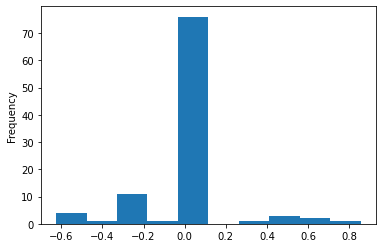

In [68]:
data['sentimiento_vader'].plot(kind='hist');

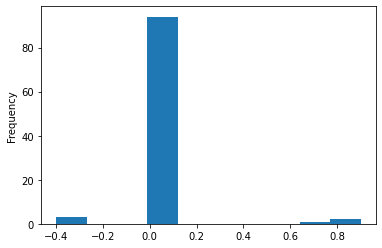

In [67]:

data['sentimiento_textblob'].plot(kind='hist');